In [6]:
import numpy as np
import pandas as pd
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from sklearn.linear_model import LogisticRegression
import struct
import os
from PIL import Image
from Support_function import data_generation
from Support_function import read_picture
from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import tensorflow as tf

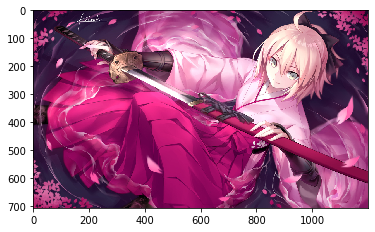

In [49]:
#my_image='image/Origi1.jpg'
#l = imread(my_image)
#plt.figure() #创建画布
#plt.imshow(l)
from PIL import Image
img = Image.open('image/Origi1.jpg')
df=pd.DataFrame([img])
souji=Image.open('../../images/Souji.jpg')
#data_generation(df,['o'])[1]
#plt.imshow(img)
head_origi = img.crop((200, 0, 550, 300))
plt.imshow(souji)
img2=img.crop((0, 0, 300, 400))


In [161]:
%matplotlib inline
x=np.array(souji)[np.newaxis,:]
kernel_in = np.broadcast_to(np.array([[1,1,1],[0,0,0],[-1,-1,-1]])[:,:,np.newaxis],(3,3,3))[np.newaxis,:]
x = tf.constant(x, dtype=tf.float32) 
kernel=tf.constant(kernel_in, dtype=tf.float32)
kernel.shape

a=tf.nn.conv2d(x, kernel, strides=1, padding='VALID') 
a=np.array(a,dtype='uint8')
a.squeeze().shape
Image.fromarray(a.squeeze()).show()

#np.array([[0,1,-1,0],[1,3,-3,-1],[1,3,-3,-1],[0,1,-1,0]])[:,:,np.newaxis].shape
#np.broadcast_to(np.array([[0,1,-1,0],[1,3,-3,-1],[1,3,-3,-1],[0,1,-1,0]])[:,:,np.newaxis],(4,4,3))

In [54]:
Origi=['Origi'+str(i) for i in range(1,8)]
A=['A'+str(i) for i in range(1,8)]
image_list=read_picture(Origi)+(read_picture(A))
df=pd.DataFrame(image_list)
label=['Origi' for i in range(7)]+['A' for i in range(7)]
train_set=data_generation(df,label)[0]
train_label=data_generation(df,label)[1]
df2=df.iloc[5:9]
df2.index=range(4)
label2=['Origi','Origi','A','A']
test_set=data_generation(df2,label2)[0]
test_label=data_generation(df2,label2)[1]
#test_label


In [15]:
#df=pd.DataFrame([head_origi,souji,head_origi,head_origi,souji,souji])
#label=['head','all','head','head','all','all']
#train_set=data_generation(df,label)[0]
#train_label=data_generation(df,label)[1]
#df2=pd.DataFrame([souji,souji,head_origi,head_origi,souji,head_origi])
#label2=['all','all','head','head','all','head']
#test_set=data_generation(df2,label2)[0]
#test_label=data_generation(df2,label2)[1]
#test_label

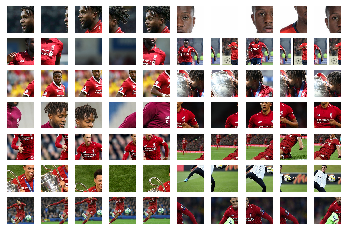

In [27]:
fig, ax = plt.subplots(7, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(train_set[i])
    axi.axis('off')
#for i in train_set:
#    Image.fromarray(i).show()

In [17]:
train_set=train_set.astype('float32')/255
test_set=test_set.astype('float32')/255

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))

In [19]:
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#train_images = train_images.reshape((60000, 28, 28, 1))
#train_images = train_images.astype('float32') / 255
#test_images = test_images.reshape((10000, 28, 28, 1))
#test_images = test_images.astype('float32') / 255
#train_labels = to_categorical(train_labels)
#test_labels = to_categorical(test_labels)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(train_set, train_label,
          batch_size=5,
          epochs=10,
          verbose=1)
test_loss, test_acc = model.evaluate(test_set, test_label)
print('Test accuracy:', test_acc)


Epoch 1/10
70/70 [==============================] - 3s 43ms/step - loss: 0.8370 - accuracy: 0.5143
Epoch 2/10
70/70 [==============================] - 3s 43ms/step - loss: 0.6346 - accuracy: 0.6286
Epoch 3/10
70/70 [==============================] - 3s 43ms/step - loss: 0.5750 - accuracy: 0.7143
Epoch 4/10
70/70 [==============================] - 3s 43ms/step - loss: 0.5445 - accuracy: 0.6857
Epoch 5/10
70/70 [==============================] - 3s 44ms/step - loss: 0.5082 - accuracy: 0.7571
Epoch 6/10
70/70 [==============================] - 3s 44ms/step - loss: 0.5370 - accuracy: 0.8429
Epoch 7/10
70/70 [==============================] - 3s 44ms/step - loss: 0.5473 - accuracy: 0.8000
Epoch 8/10
70/70 [==============================] - 3s 44ms/step - loss: 0.2657 - accuracy: 0.9143
Epoch 9/10
70/70 [==============================] - 3s 45ms/step - loss: 0.2220 - accuracy: 0.9286
Epoch 10/10
20/20 [==============================] - 0s 13ms/step
Test accuracy: 0.75


In [12]:
#model.predict(test_set)

(0.7077815532684326, 0.6499999761581421)